# 3rd Drill

## Importing the dependencies

In [2]:
import pandas as pd
import numpy as np
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import random
import re
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

### Loading the datasets

In [3]:
data = pd.read_csv('./data/train_set.csv')

In [4]:
data.head()

,content,polarity
0,<number> ruangan itu tidak siap oleh <number>...,negative
1,ada tidak ada pantai dan <number> menit berjal...,negative
2,ada tidak ada restoran karena dalam perbaikan ...,negative
3,ada tidak ada restoran karena dalam perbaikan ...,negative
4,ada yang bilang harga tidak boong atau ada har...,negative


## Exploration

Let's check on the attributes of the dataset

In [5]:
print(f"Number of rows: {len(data)}")

Number of rows: 12389


In [6]:
data.columns

Index(['content', 'polarity'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12389 entries, 0 to 12388
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   12389 non-null  object
 1   polarity  12389 non-null  object
dtypes: object(2)
memory usage: 193.7+ KB


Seems like there's no missing values, but we'll check that later on

Now, let's check the values

Let's make sure the possible values for `polarity`

In [8]:
data['polarity'].unique()

array(['negative', 'positive'], dtype=object)

In [9]:
data['content']

0         <number> ruangan itu tidak siap oleh <number>...
1        ada tidak ada pantai dan <number> menit berjal...
2        ada tidak ada restoran karena dalam perbaikan ...
3        ada tidak ada restoran karena dalam perbaikan ...
4        ada yang bilang harga tidak boong atau ada har...
                               ...                        
12384    zangrandi gm p <number> maret <number> setelah...
12385    zeer gud erg vriendelijk personeel denken gud ...
12386    zenbu mengedepankan makanan jepang fusion rasa...
12387    zenbu merupakan jenis restaurant jepang yang m...
12388    zenbu salah satu restoran japanese food yang m...
Name: content, Length: 12389, dtype: object

In [10]:
negative_polarity = (data['polarity'] == 'negative').sum()
print(f"Number of negative polarity data: {negative_polarity} or {(negative_polarity / len(data)) * 100:.2f}%")

Number of negative polarity data: 6108 or 49.30%


In [11]:
positive_polarity = (data['polarity'] == 'positive').sum()
print(f"Number of positive polarity data: {positive_polarity} or {(positive_polarity / len(data)) * 100:.2f}%")

Number of positive polarity data: 6281 or 50.70%


Let's check for the missing values

In [12]:
data.isna().sum()

content     0
polarity    0
dtype: int64

In [13]:
print(f"Number of duplicated data: {data.duplicated().sum()}")

Number of duplicated data: 2573


That's quite a lot of duplicated data, let's just drop them to reduce computational cost

In [14]:
data = data.drop_duplicates()

In [15]:
print(f"Number of duplicated data (after cleaning): {data.duplicated().sum()}")

Number of duplicated data (after cleaning): 0


Let's just go straight into casefolding

In [16]:
data['content'] = data['content'].apply(lambda x: x.lower()).values

Afer the text content has been casefolded, we'll stem them

In [17]:
def normalize_text(text: str):
    normalized_text = re.sub('\n', ' ', text) # Remove newlines
    normalized_text = re.sub(r'<number>', '', normalized_text) # Remove the <number>s
    normalized_text = re.sub(r'[^a-zA-z]+', ' ', normalized_text) # Remove non-alphabets
    normalized_text = re.sub(r'  +', ' ', normalized_text)
    normalized_text = normalized_text.strip()
    return normalized_text

In [18]:
data['content'] = data['content'].apply(lambda x: normalize_text(x))

Now that the normalization is done, we can continue to the stemming and stop-words removal

In [19]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [20]:
stemmed_contents = data['content'].apply(lambda x: stemmer.stem(x))
data['content'] = stemmed_contents.values

In [ ]:
stop_words = set(stopwords.words('indonesian'))
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
stop_words_encounters = {word: 0 for word in stop_words}
stop_words_encounters

{'disebutkan': 0,
 'malahan': 0,
 'serta': 0,
 'mengatakannya': 0,
 'dipunyai': 0,
 'kalau': 0,
 'berkata': 0,
 'kini': 0,
 'per': 0,
 'diketahuinya': 0,
 'pertama-tama': 0,
 'ditujukan': 0,
 'nyaris': 0,
 'berapalah': 0,
 'membuat': 0,
 'hari': 0,
 'dirinya': 0,
 'tempat': 0,
 'kesampaian': 0,
 'bagaimanapun': 0,
 'turut': 0,
 'dimulainya': 0,
 'ternyata': 0,
 'yakin': 0,
 'lagi': 0,
 'jikalau': 0,
 'setiap': 0,
 'dimintai': 0,
 'sebaik-baiknya': 0,
 'berikan': 0,
 'semisal': 0,
 'penting': 0,
 'demikian': 0,
 'sebaik': 0,
 'sekaligus': 0,
 'khususnya': 0,
 'dapat': 0,
 'enggaknya': 0,
 'ingat': 0,
 'tadi': 0,
 'padahal': 0,
 'terasa': 0,
 'ucap': 0,
 'sendiri': 0,
 'naik': 0,
 'rasa': 0,
 'semakin': 0,
 'tinggi': 0,
 'segala': 0,
 'diingat': 0,
 'berlangsung': 0,
 'menyangkut': 0,
 'sejenak': 0,
 'baik': 0,
 'setengah': 0,
 'mengenai': 0,
 'dipergunakan': 0,
 'sehingga': 0,
 'tanya': 0,
 'seingat': 0,
 'tersampaikan': 0,
 'mengetahui': 0,
 'ditegaskan': 0,
 'sebab': 0,
 'dipastikan':

In [ ]:
documents: list[str] = data['content'].values.tolist()

In [ ]:
prepro_documents: list[str] = [] # Preprocessed text documents
words_set = set() # Set of words in the data

for document in documents:
    words = document.split()
    for word in words:
        if word in stop_words:
            stop_words_encounters[word] += 1

    filtered = [word for word in words if word not in stop_words] # Cleaning stop-words
    words_set.update(filtered)
    
    prepro_documents.append(' '.join(filtered))

In [ ]:
sw_encounters_df = pd.DataFrame(zip(list(stop_words_encounters.keys()), list(stop_words_encounters.values())), columns=["Stop-words", "Encounters"])

In [ ]:
sw_encounters_df

,Stop-words,Encounters
0,disebutkan,0
1,malahan,0
2,serta,221
3,mengatakannya,0
4,dipunyai,0
...,...,...
752,menghendaki,0
753,entahlah,0
754,empat,74
755,tahun,421


In [ ]:
sw_encounters_df.sort_values("Encounters", ascending=False)

,Stop-words,Encounters
178,yang,15459
148,dan,14357
407,di,11909
153,untuk,8859
421,tidak,8380
...,...,...
309,akhiri,0
310,menantikan,0
311,mengibaratkannya,0
312,menanti,0


In [ ]:
top_sw_encounters_df = sw_encounters_df.sort_values("Encounters", ascending=False)[:10]
top_sw_encounters_df

,Stop-words,Encounters
178,yang,15459
148,dan,14357
407,di,11909
153,untuk,8859
421,tidak,8380
525,saya,7795
183,kami,7114
182,ini,6750
682,dengan,5627
698,sangat,5044


Text(0.5, 1.0, 'Stop word encounters')

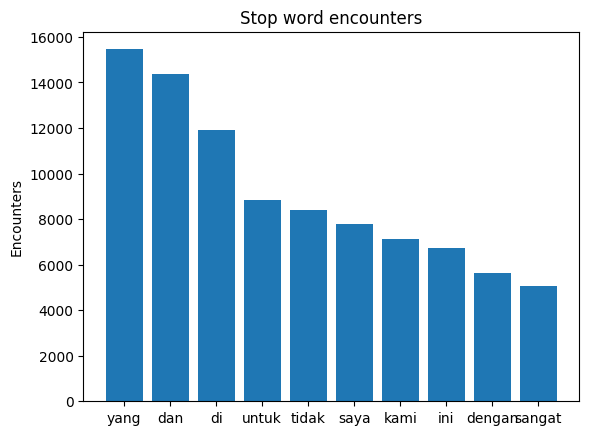

In [ ]:
fig, ax = plt.subplots()
ax.bar(top_sw_encounters_df['Stop-words'], top_sw_encounters_df['Encounters'])
ax.set_ylabel("Encounters")
ax.set_title("Stop word encounters")

In [ ]:
prepro_documents

['ruang jam pikir serius bersih butuh suara timbang hotel pergi anak sempit hotel buah hotel bintang nikmat lingkung kecuali mabuk',
 'pantai menit jalan kaki pantai kuta matahari benam indah mahal hotel definisi tua daerah hotel usang pura pura puncak sarap istimewa banding hotel',
 'restoran pemberitahuan ambil foto jelek biaya euro sarap nyata layak serangga ruang lemari diberitahu staf periksa kamar malam',
 'bilang harga boong harga barang kutip kutip laku hotel yg laku warna kulit bersih fasilitas hotel layan hadap turis lokal buruk counterstage breakfast layan beda turis asing',
 'bocor ac server kasir ramah bantu pandang makan minum',
 'keras musik bar ganggu inap hostel musik keras malam jam gpm jam makan buruk',
 'lihat restoran pantai nikmat matahari benam makan makan laut sayang makan harga bayar kecewa sunset acara bagus',
 'pm check in minum suguh klub hidang a carte saji menit makan selesai ambil kering tangguh kentang tumbuk dingin pilih pulau',
 'hati unjung jalan pili

In [ ]:
words_set

{'tudak',
 'peu',
 'yes',
 'kutu',
 'usang',
 'eoorb',
 'jok',
 'konsisten',
 'woow',
 'dissappointed',
 'kekkamar',
 'australian',
 'todong',
 'kmren',
 'negative',
 'unruk',
 'sardine',
 'wandeling',
 'dedaunan',
 'nasib',
 'papan',
 'burgee',
 'ridiculus',
 'cuminya',
 'waiternya',
 'satrio',
 'exhause',
 'meguro',
 'berok',
 'archipelago',
 'seafod',
 'rnd',
 'yahh',
 'nyoba',
 'fudgy',
 'cajunnya',
 'jawanya',
 'upgraded',
 'kereen',
 'kelok',
 'uwuh',
 'amakara',
 'lemes',
 'hajat',
 'snack',
 'heater',
 'control',
 'honeymoon',
 'remember',
 'kerlap',
 'excelelnt',
 'silang',
 'disiapin',
 'services',
 'ohh',
 'kalautk',
 'taon',
 'indra',
 'tiam',
 'biz',
 'speedboat',
 'keciil',
 'saji',
 'pots',
 'crispy',
 'amazingii',
 'piano',
 'staf',
 'fitry',
 'th',
 'ramada',
 'banyumanik',
 'attraction',
 'cekikik',
 'mentang',
 'espektasi',
 'esens',
 'large',
 'smoothie',
 'onion',
 'literrally',
 'samalona',
 'poyah',
 'konsekwensi',
 'kana',
 'krn',
 'resotran',
 'tukar',
 'dirjen

In [ ]:
data['content'] = prepro_documents # Change the 'content'

Let's see the word clouds of this preprocessed documents

In [ ]:
merged_text = ' '.join(prepro_documents)
merged_text

'ruang jam pikir serius bersih butuh suara timbang hotel pergi anak sempit hotel buah hotel bintang nikmat lingkung kecuali mabuk pantai menit jalan kaki pantai kuta matahari benam indah mahal hotel definisi tua daerah hotel usang pura pura puncak sarap istimewa banding hotel restoran pemberitahuan ambil foto jelek biaya euro sarap nyata layak serangga ruang lemari diberitahu staf periksa kamar malam bilang harga boong harga barang kutip kutip laku hotel yg laku warna kulit bersih fasilitas hotel layan hadap turis lokal buruk counterstage breakfast layan beda turis asing bocor ac server kasir ramah bantu pandang makan minum keras musik bar ganggu inap hostel musik keras malam jam gpm jam makan buruk lihat restoran pantai nikmat matahari benam makan makan laut sayang makan harga bayar kecewa sunset acara bagus pm check in minum suguh klub hidang a carte saji menit makan selesai ambil kering tangguh kentang tumbuk dingin pilih pulau hati unjung jalan pilih hukum nd anak anak nikmat fasil

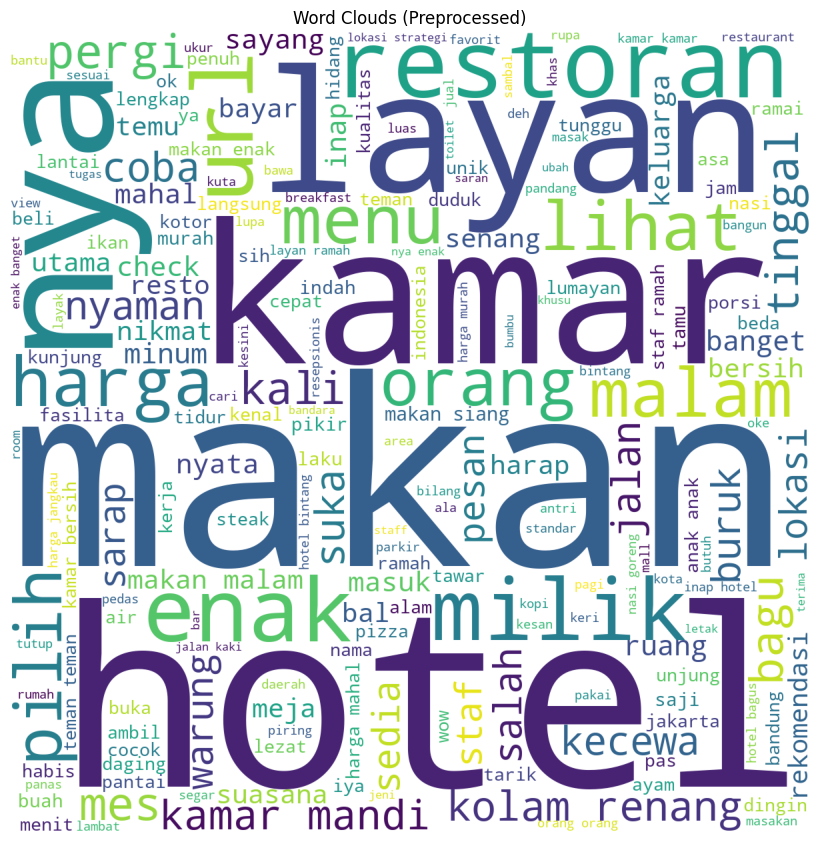

In [ ]:
wordcloud = WordCloud(width=1200, height=1200, stopwords=None, min_font_size=8, background_color='white').generate(merged_text) 
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Clouds (Preprocessed)")
plt.show()

We also want to test our model, so let's split the data into training and testing portion

In [ ]:
def split_data(data: pd.DataFrame, train_ratio=.8, random_state=0):
    random.seed(random_state)
    
    list_data = data.values.tolist()
    random.shuffle(list_data), 
    split_index = int(len(list_data) * train_ratio)
    
    train, test = list_data[:split_index], list_data[split_index:]
    return train, test

In [ ]:
train, test = split_data(data)

In [ ]:
train_df = pd.DataFrame(train, columns=data.columns)
test_df = pd.DataFrame(test, columns=data.columns)

In [ ]:
train_df.head()

,content,polarity
0,kesana lantai memuaska kolam renang lokasi str...,positive
1,typical ukur nasi uduk bungkus daun harga dtaw...,negative
2,pergi periksa restoran kecewa kunjung mes maka...,negative
3,jenguk amerika sarap aud telur roti panggang b...,positive
4,kali unjung palembang tinggal hotel grand zuri...,negative


In [ ]:
test_df.head()

,content,polarity
0,alami malang hadir tur jam awat hotel panas ke...,negative
1,pergi momo susu guoang keluarga nyaman coba ba...,negative
2,unjung makan buruk layan standar suasana hotel...,negative
3,muncul minum perahu bal teman nasi goreng dudu...,negative
4,utama halal an makan masuk tubuh makan buah ka...,positive


Now let's move on to the last step, tokenization

In [ ]:
tfidf_matrix = np.zeros((len(train), len(words_set)))
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
word_to_index = {word: i for i, word in enumerate(words_set)}
word_to_index

{'tudak': 0,
 'peu': 1,
 'yes': 2,
 'kutu': 3,
 'usang': 4,
 'eoorb': 5,
 'jok': 6,
 'konsisten': 7,
 'woow': 8,
 'dissappointed': 9,
 'kekkamar': 10,
 'australian': 11,
 'todong': 12,
 'kmren': 13,
 'negative': 14,
 'unruk': 15,
 'sardine': 16,
 'wandeling': 17,
 'dedaunan': 18,
 'nasib': 19,
 'papan': 20,
 'burgee': 21,
 'ridiculus': 22,
 'cuminya': 23,
 'waiternya': 24,
 'satrio': 25,
 'exhause': 26,
 'meguro': 27,
 'berok': 28,
 'archipelago': 29,
 'seafod': 30,
 'rnd': 31,
 'yahh': 32,
 'nyoba': 33,
 'fudgy': 34,
 'cajunnya': 35,
 'jawanya': 36,
 'upgraded': 37,
 'kereen': 38,
 'kelok': 39,
 'uwuh': 40,
 'amakara': 41,
 'lemes': 42,
 'hajat': 43,
 'snack': 44,
 'heater': 45,
 'control': 46,
 'honeymoon': 47,
 'remember': 48,
 'kerlap': 49,
 'excelelnt': 50,
 'silang': 51,
 'disiapin': 52,
 'services': 53,
 'ohh': 54,
 'kalautk': 55,
 'taon': 56,
 'indra': 57,
 'tiam': 58,
 'biz': 59,
 'speedboat': 60,
 'keciil': 61,
 'saji': 62,
 'pots': 63,
 'crispy': 64,
 'amazingii': 65,
 'pian

## TF-IDF

In [ ]:
idf = {word: np.log(len(train) / (1 + sum(word in document for document in train))) for word in words_set}
idf

{'tudak': 8.968523555396352,
 'peu': 8.968523555396352,
 'yes': 8.968523555396352,
 'kutu': 8.968523555396352,
 'usang': 8.968523555396352,
 'eoorb': 8.968523555396352,
 'jok': 8.968523555396352,
 'konsisten': 8.968523555396352,
 'woow': 8.968523555396352,
 'dissappointed': 8.968523555396352,
 'kekkamar': 8.968523555396352,
 'australian': 8.968523555396352,
 'todong': 8.968523555396352,
 'kmren': 8.968523555396352,
 'negative': 0.7679607583877879,
 'unruk': 8.968523555396352,
 'sardine': 8.968523555396352,
 'wandeling': 8.968523555396352,
 'dedaunan': 8.968523555396352,
 'nasib': 8.968523555396352,
 'papan': 8.968523555396352,
 'burgee': 8.968523555396352,
 'ridiculus': 8.968523555396352,
 'cuminya': 8.968523555396352,
 'waiternya': 8.968523555396352,
 'satrio': 8.968523555396352,
 'exhause': 8.968523555396352,
 'meguro': 8.968523555396352,
 'berok': 8.968523555396352,
 'archipelago': 8.968523555396352,
 'seafod': 8.968523555396352,
 'rnd': 8.968523555396352,
 'yahh': 8.968523555396352

In [ ]:
for i, document in enumerate(train_df['content'].values.tolist()):
    tokens = document.split()
    word_count = Counter(tokens)
    doc_length = len(tokens)
    for word, count in word_count.items():
        tf = count / doc_length
        tfidf_matrix[i, word_to_index[word]] = tf * idf[word]

In [ ]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix, columns=list(words_set))
tfidf_df

,tudak,peu,yes,kutu,usang,eoorb,jok,konsisten,woow,dissappointed,...,berani,kombinasi,usus,kompleks,rare,penggunjung,blenduk,mggu,weekdays,bulayak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_df.describe()

,tudak,peu,yes,kutu,usang,eoorb,jok,konsisten,woow,dissappointed,...,berani,kombinasi,usus,kompleks,rare,penggunjung,blenduk,mggu,weekdays,bulayak
count,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,...,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.000000,7852.0,7852.000000,7852.000000,7852.000000
mean,0.000041,0.000050,0.000672,0.000231,0.001711,0.000034,0.000054,0.001325,0.000509,0.000063,...,0.000808,0.000815,0.000382,0.000760,0.000141,0.000044,0.0,0.000048,0.000094,0.000104
std,0.003615,0.004401,0.017700,0.009286,0.025936,0.002977,0.004820,0.031785,0.014846,0.005623,...,0.018536,0.019496,0.013143,0.017035,0.007683,0.003893,0.0,0.004217,0.004868,0.009201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,0.320304,0.389936,0.689886,0.472028,0.618519,0.263780,0.427073,1.494754,0.640609,0.498251,...,0.640609,0.815320,0.560533,0.597902,0.560533,0.344943,0.0,0.373688,0.280266,0.815320


## KNN

In [ ]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0  # Avoid division by zero
    return dot_product / (norm_v1 * norm_v2)

In [ ]:
# Using cosine similarity
def knn_predict(new_vector, tfidf_matrix, labels, k=3):
    similarities = [cosine_similarity(new_vector, tfidf_vector) for tfidf_vector in tfidf_matrix]
    top_indices = np.argsort(similarities)[-k:]  # Indices of top k similar documents
    label_votes = [labels[i] for i in top_indices]
    predicted_label = max(set(label_votes), key=label_votes.count)  # Majority voting
    return predicted_label

In [ ]:
# Function to predict a new sentence
def predict(sentence: str):
    vector = np.zeros(len(words_set))
    for word in sentence.lower().split():
        if word in word_to_index:
            vector[word_to_index[word]] += 1
    
    prediction = knn_predict(vector, tfidf_matrix, train_df['polarity'])
    return prediction

In [ ]:
def calculate_acc(actual: list[str], forecast: list[str]):
    correct_predictions = 0
    total_data = len(actual)
    
    for actual_val, forecast_val in list(zip(actual, forecast)):
        if actual_val == forecast_val:
            correct_predictions += 1
    
    accuracy = correct_predictions / total_data * 100
    return accuracy

NameError: name 'test_df' is not defined

In [ ]:
predictions = [predict(text) for text in test_df['content'].values.tolist()]

In [ ]:
accuracy = calculate_acc(test_df['polarity'].values.tolist(), )